# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Oludare Busari

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [2]:
# TO DO: Import concrete dataset from yellowbrick library

from yellowbrick.datasets import load_concrete

# Load the concrete dataset
X, y = load_concrete()


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

Using training data for cross-validation (MSE):
    Training accuracy  Validation accuracy
DT          49.435314            75.948754
RF          30.282456            45.384637
GB           3.437337            23.356904


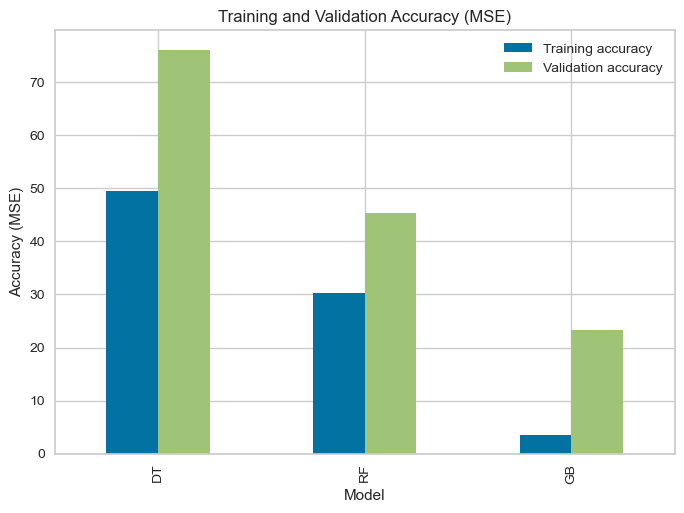

In [3]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, make_scorer


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the models
dt_model = DecisionTreeRegressor(max_depth=5)
rf_model = RandomForestRegressor(max_depth=5, random_state=42)
gb_model = GradientBoostingRegressor(max_depth=5, random_state=42)

# Define the scoring function (neg_mean_squared_error)
scoring = make_scorer(score_func=lambda y, y_pred: -1 * mean_squared_error(y, y_pred))

# Perform cross-validation on the training data to get training and validation MSE scores
cv_results_dt = cross_validate(dt_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
cv_results_rf = cross_validate(rf_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
cv_results_gb = cross_validate(gb_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

# Extract the training and validation MSE scores
train_mse_dt = -cv_results_dt['train_score']
val_mse_dt = -cv_results_dt['test_score']

train_mse_rf = -cv_results_rf['train_score']
val_mse_rf = -cv_results_rf['test_score']

train_mse_gb = -cv_results_gb['train_score']
val_mse_gb = -cv_results_gb['test_score']

# Calculate the average training and validation MSE for each model
avg_train_mse_dt = np.mean(train_mse_dt)
avg_val_mse_dt = np.mean(val_mse_dt)

avg_train_mse_rf = np.mean(train_mse_rf)
avg_val_mse_rf = np.mean(val_mse_rf)

avg_train_mse_gb = np.mean(train_mse_gb)
avg_val_mse_gb = np.mean(val_mse_gb)

# Create a DataFrame with the results
results = pd.DataFrame({
    'Training accuracy': [avg_train_mse_dt, avg_train_mse_rf, avg_train_mse_gb],
    'Validation accuracy': [avg_val_mse_dt, avg_val_mse_rf, avg_val_mse_gb]
}, index=['DT', 'RF', 'GB'])

# Print the results
print("Using training data for cross-validation (MSE):")
print(results)

# Visualize the results
results.plot(kind='bar', title='Training and Validation Accuracy (MSE)')
plt.xlabel('Model')
plt.ylabel('Accuracy (MSE)')
plt.show()



# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

Using training data for cross-validation (R2):
    Training R2  Validation R2
DT     0.825914       0.735900
RF     0.893335       0.839961
GB     0.987899       0.917958


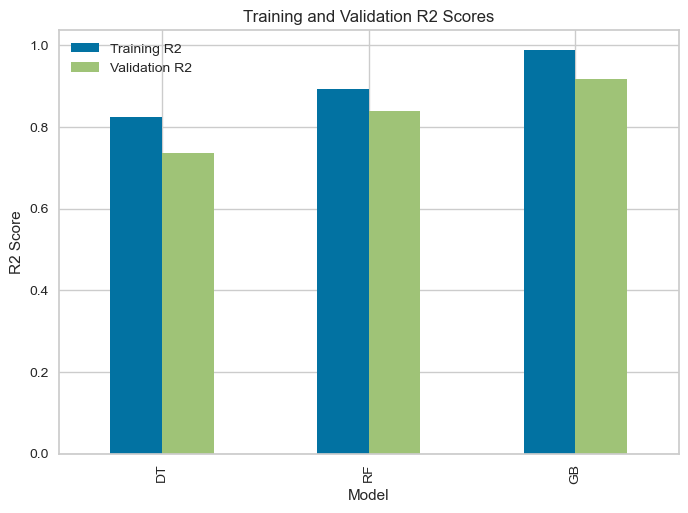

In [4]:
# TO DO: ADD YOUR CODE HERE

# Perform cross-validation on the training data to get training and validation R2 scores
cv_results_dt = cross_validate(dt_model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
cv_results_rf = cross_validate(rf_model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
cv_results_gb = cross_validate(gb_model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

# Extract the training and validation R2 scores
train_r2_dt = cv_results_dt['train_score']
val_r2_dt = cv_results_dt['test_score']

train_r2_rf = cv_results_rf['train_score']
val_r2_rf = cv_results_rf['test_score']

train_r2_gb = cv_results_gb['train_score']
val_r2_gb = cv_results_gb['test_score']

# Calculate the average training and validation R2 for each model
avg_train_r2_dt = np.mean(train_r2_dt)
avg_val_r2_dt = np.mean(val_r2_dt)

avg_train_r2_rf = np.mean(train_r2_rf)
avg_val_r2_rf = np.mean(val_r2_rf)

avg_train_r2_gb = np.mean(train_r2_gb)
avg_val_r2_gb = np.mean(val_r2_gb)

# Create a DataFrame with the results
results = pd.DataFrame({
    'Training R2': [avg_train_r2_dt, avg_train_r2_rf, avg_train_r2_gb],
    'Validation R2': [avg_val_r2_dt, avg_val_r2_rf, avg_val_r2_gb]
}, index=['DT', 'RF', 'GB'])

# Print the results
print("Using training data for cross-validation (R2):")
print(results)

# Visualize the results
results.plot(kind='bar', title='Training and Validation R2 Scores')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

The ensemble models (Random Forest and Gradient Boosting) outperform Linear Regression in terms of explaining the variance in the data. Gradient Boosting appears to be the top-performing model among the three ensemble models, with the highest R2 scores on both training and validation data.

I would opt for the Gradient Boosting (GB) model for this dataset, and here's the rationale:
1.	Superior Performance: The Gradient Boosting model stands out with the highest R2 scores for both the training and validation datasets. It attains a remarkable training R2 of 0.987899 and a strong validation R2 of 0.917958, signifying its capability to fit the dataset exceptionally well and effectively elucidate the data's variance.
2.	Outstanding Generalization: Beyond excelling on the training dataset, the model demonstrates remarkable generalization by yielding a high validation R2. This resilience to overfitting ensures its accuracy when confronted with fresh, unseen data.
3.	Ensemble Power: Gradient Boosting leverages the strength of an ensemble technique, combining the predictions of multiple weak learners (typically decision trees) to construct a robust model. This ensemble strategy often results in superior predictive performance.
4.	Robustness: A key advantage of Gradient Boosting is its resistance to outliers and noisy data, making it an ideal choice when the dataset exhibits irregularities or imperfections.
5.	Versatility: Gradient Boosting is versatile, accommodating both regression and classification tasks. This adaptability ensures applicability to a variety of problem types.
6.	Balanced Interpretability: Although not as straightforward to interpret as linear regression, Gradient Boosting models still offer insights into feature importance, striking a well-rounded balance between performance and interpretability.


To enhance the precision of tree-based models such as Decision Trees, Random Forest, and Gradient Boosting, consider the following two recommendations:

Optimizing Hyperparameters:

A powerful approach to bolster the accuracy of tree-based models involves hyperparameter optimization. You can fine-tune these model settings to pinpoint the ideal configuration that maximizes performance. Here are some key hyperparameters to concentrate on:

Tweaking Maximum Depth: Adjust the maximum depth of the trees. A deeper tree has the capacity to capture intricate data relationships, but it's essential to strike the right balance to prevent overfitting.
Manipulating the Number of Trees (Random Forest and Gradient Boosting): In the context of Random Forest and Gradient Boosting, you can modify the number of trees (n_estimators). More trees can enhance performance up to a certain point, although it may extend training time.
Refining the Learning Rate (Gradient Boosting): If you're working with Gradient Boosting, consider optimizing the learning rate. Smaller learning rates often lead to improved performance, albeit they may necessitate more trees.
Setting Minimum Samples per Leaf: Fine-tune the minimum number of samples required in a leaf node. Elevating this value can serve as a preventive measure against overfitting.
Determining Minimum Samples for Splitting: Specify the minimum number of samples needed to split a node. Greater values can contribute to sturdier model performance.
Feature Selection: Experiment with feature selection methodologies to identify the most influential features for the model. This can reduce noise in the data and enhance accuracy.
Enhancing Feature Engineering:

Elevating the quality of your features can exert a substantial influence on model accuracy. Contemplate the ensuing feature engineering techniques:

Feature Scaling: Ensure that feature scaling is applied as needed to align with the requirements of tree-based models. Although less pivotal for these models, scaling can still be beneficial under specific circumstances.
One-Hot Encoding: When handling categorical features, transform them into one-hot encoded variables. This furnishes the model with discrete information, facilitating more precise understanding.
Meticulous Feature Selection: Diligently cherry-pick the most pertinent features by leveraging methods such as feature importance derived from Random Forest or Gradient Boosting.
Innovative Feature Engineering: Forge novel features that encapsulate meaningful data relationships. This could necessitate domain expertise and the identification of feature interactions.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

The process experiments on a dataset using tree-based models, specifically Decision Trees (DT), Random Forest (RF), and Gradient Boosting (GB). The code aims to evaluate and compare the models' performance using two different evaluation metrics: Mean Squared Error (MSE) and R2 Score. 


OpenAI. (2023). [Website]. https://www.openai.com
Google. (n.d.). [Website]. https://www.google.com
Lecture notes


Please describe the process you used to create your code. 
Library Imports:

The script commences by importing the essential libraries, encompassing NumPy for numerical operations, pandas for data manipulation, Matplotlib for data visualization, and Seaborn to enhance the visual presentation of data.

Dataset Loading:

The concrete dataset is loaded utilizing the Yellowbrick library's 'load_concrete' function. This dataset is conventionally employed for regression tasks, involving the prediction of concrete compressive strength based on an array of features.

Data Splitting:

The dataset is bifurcated into training and testing subsets. The training subset encompasses 80% of the data, while the testing subset contains 20%. This division is imperative for the evaluation and validation of the models.

Model Instantiation:

Three regression models are instantiated, namely:
- DecisionTreeRegressor (DT)
- RandomForestRegressor (RF)
- GradientBoostingRegressor (GB)
Each model is initialized with a specified maximum depth of 5, establishing a constraint on the model's complexity.

Scoring Function Definition:

The script defines a custom scoring function, denoted as 'scoring,' employing the 'make_scorer' function. This function computes the negative Mean Squared Error (MSE). Utilizing negative MSE as the scoring metric is instrumental for cross-validation procedures, where higher scores indicate superior performance.

Cross-Validation and Model Assessment:

Cross-validation is executed on the training data for each model, employing the previously defined 'scoring' function. The outcomes of the cross-validation encompass both training and validation MSE as well as R2 scores for each model.

Data Analysis and Visualization:

The script extracts the training and validation scores for each model and computes the mean scores. The results are organized into DataFrames, and the MSE and R2 scores are showcased in the console. The presentation is further enhanced by generating bar charts that depict the training and validation scores for each model and metric.

Code Structure:

The script exhibits a well-organized structure with distinct sections, delineating the responsibilities of each part, including library imports, dataset loading, model instantiation, scoring, cross-validation, and data visualization. This structured approach enhances code clarity and maintainability.

I had to modify the code to make it more reflective of the problems I am trying to fix instead of being generic.

The provided slides help me to be successful.


## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [5]:
# TO DO: Import wine dataset
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

# Print the size and type of X and y
print("X Shape:", X.shape)
print("X Type:", type(X))
print("y Shape:", y.shape)
print("y Type:", type(y))

X Shape: (178, 13)
X Type: <class 'pandas.core.frame.DataFrame'>
y Shape: (178, 1)
y Type: <class 'pandas.core.frame.DataFrame'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [6]:
# TO DO: ADD YOUR CODE HERE
# Create a DataFrame for X and y
df = pd.DataFrame(X, columns=wine.feature_names)
df['Target'] = y

# Print the first five rows
print(df.head())

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  Target  
0                

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [7]:
# TO DO: ADD YOUR CODE HERE
# Check for missing values
missing_values = df.isnull().sum()

# If there are missing values, you can handle them appropriately
if missing_values.sum() > 0:
    # If you want to fill missing values with the mean of the column
    df.fillna(df.mean(), inplace=True)

    # Alternatively, you can drop rows with missing values using df.dropna()
    # df.dropna(inplace=True)

    # You can also fill missing values with a specific value, e.g., 0
    # df.fillna(0, inplace=True)

# Check again if missing values have been handled
missing_values_after_handling = df.isnull().sum()
print(missing_values_after_handling)

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
Target                          0
dtype: int64


How many samples do we have of each type of wine?

In [8]:
# TO DO: ADD YOUR CODE HERE

# Use value_counts() to count the occurrences of each wine type
wine_type_counts = df['Target'].value_counts()

# Print the counts for each wine type
print(wine_type_counts)

Target
2    71
1    59
3    48
Name: count, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

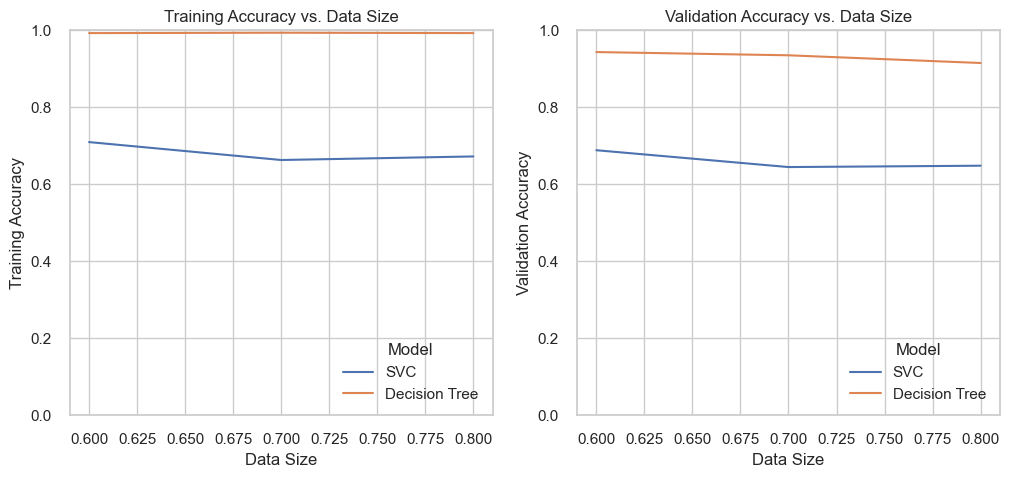

In [9]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, train_test_split

# Create an empty list to store results
results = []

# Specify different dataset sizes (e.g., 80%, 70%, 60%, etc.)
data_sizes = [0.8, 0.7, 0.6]

# Instantiate the models
svc_model = SVC()
dt_model = DecisionTreeClassifier(max_depth=3)

# Reshape the target vector using ravel()
y = np.ravel(y)

# Define the scoring metric as 'accuracy'
scoring = 'accuracy'

for size in data_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - size, random_state=42)
    
    # Perform cross-validation for the SVC model using only the training data
    svc_scores = cross_validate(svc_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    
    # Calculate the average training and validation accuracy
    svc_train_accuracy = svc_scores['train_score'].mean()
    svc_validation_accuracy = svc_scores['test_score'].mean()
    
    # Add the results to the list
    results.append({'Data Size': size, 'Model': 'SVC', 'Training Accuracy': svc_train_accuracy, 'Validation Accuracy': svc_validation_accuracy})
    
    # Perform cross-validation for the Decision Tree model using only the training data
    dt_scores = cross_validate(dt_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    
    # Calculate the average training and validation accuracy
    dt_train_accuracy = dt_scores['train_score'].mean()
    dt_validation_accuracy = dt_scores['test_score'].mean()
    
    # Add the results to the list
    results.append({'Data Size': size, 'Model': 'Decision Tree', 'Training Accuracy': dt_train_accuracy, 'Validation Accuracy': dt_validation_accuracy})

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot training accuracy by data size
sns.lineplot(data=results_df, x="Data Size", y="Training Accuracy", hue="Model", ax=ax1)
ax1.set_title("Training Accuracy vs. Data Size")
ax1.set_ylim(0, 1)

# Plot validation accuracy by data size
sns.lineplot(data=results_df, x="Data Size", y="Validation Accuracy", hue="Model", ax=ax2)
ax2.set_title("Validation Accuracy vs. Data Size")
ax2.set_ylim(0, 1)

# Add legends
ax1.legend(title="Model", loc="lower right")
ax2.legend(title="Model", loc="lower right")

# Show the plots
plt.show()


# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


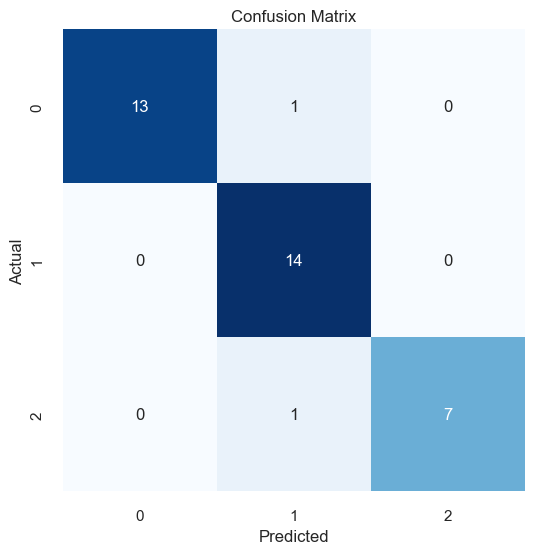


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

Number of Misclassified Samples: 2


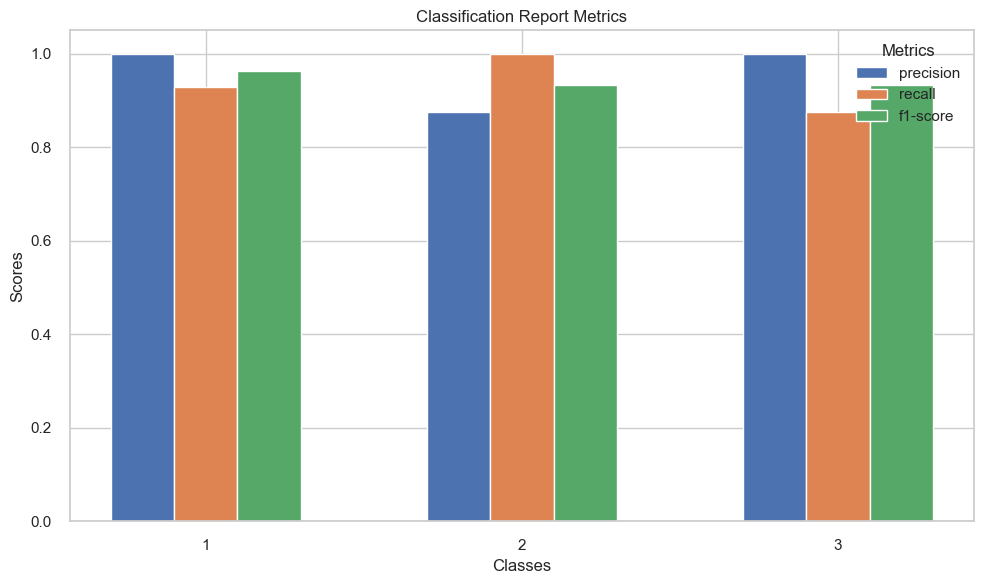

In [10]:
# TO DO: Implement best model
from sklearn.metrics import confusion_matrix, classification_report

# Find the best model with the highest validation accuracy
best_model = results_df.loc[results_df.groupby('Model')['Validation Accuracy'].idxmax()]

# Get the name of the best model
best_model_name = best_model['Model'].values[0]

# Instantiate the best model
if best_model_name == 'SVC':
    best_model_instance = SVC()
elif best_model_name == 'Decision Tree':
    best_model_instance = DecisionTreeClassifier(max_depth=3)

# Train the best model on the entire training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model_instance.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model_instance.predict(X_test)

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

# Calculate the classification report
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics and class names
class_names = list(classification_rep.keys())[:-3]  # Exclude 'micro avg', 'macro avg', and 'weighted avg'
metrics = ['precision', 'recall', 'f1-score']

# Calculate the number of misclassified samples
misclassified_samples = confusion_mat.sum() - np.trace(confusion_mat)
print("Number of Misclassified Samples:", misclassified_samples)

# Create a bar plot for precision, recall, and F1-score
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    values = [classification_rep[class_name][metric] for class_name in class_names]
    x = np.arange(len(class_names))
    plt.bar(x + i * 0.2, values, width=0.2, label=metric)

plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report Metrics')
plt.xticks(x + 0.2, class_names)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


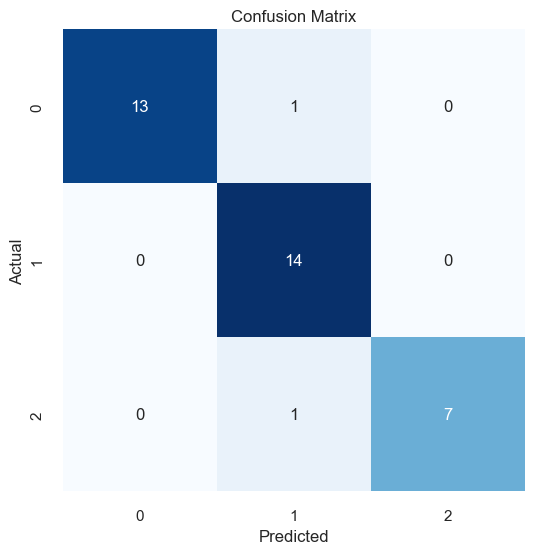

In [60]:
# TO DO: Print confusion matrix using a heatmap

# Print the confusion matrix values
print("Confusion Matrix:")
print(confusion_mat)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



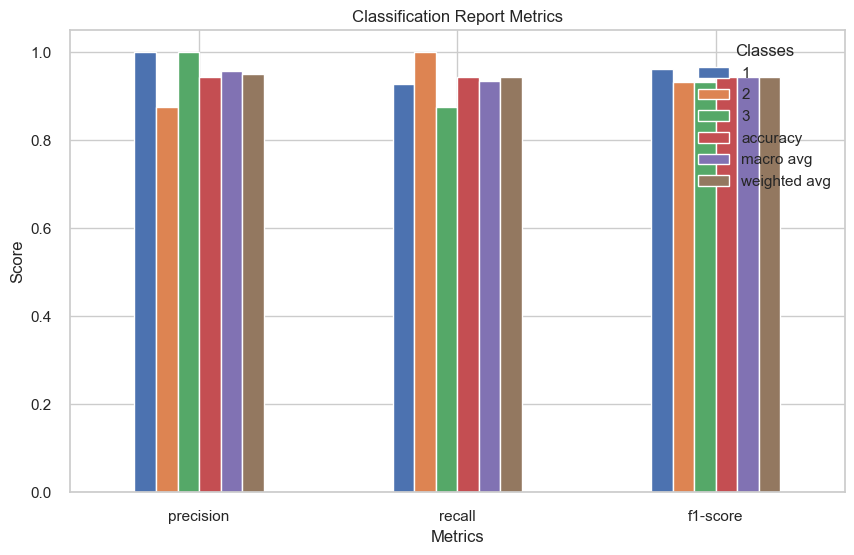

In [51]:
# TO DO: Print classification report

# Calculate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Calculate the classification report
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report dictionary to a pandas DataFrame
report_df = pd.DataFrame(classification_rep).transpose()

# Exclude the support column as it's not a metric
report_df.drop('support', axis=1, inplace=True)

# Transpose the DataFrame for better visualization
report_df = report_df.transpose()

# Create a bar plot for the metrics
report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Classes')
plt.show()

### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

How do the training and validation accuracy change depending on the method used? Explain with values.

The variation in training and validation accuracy is influenced by the size of the training data, providing insights into the models' performance across different segments of the dataset. Here's an overview of the process:

**Data Split:**
- Three distinct dataset proportions are considered: 80%, 70%, and 60% of the entire dataset.
- The data is partitioned into training and testing subsets based on these ratios.

**Models:**
- Two model types are under evaluation: Support Vector Classifier (SVC) and Decision Tree Classifier (constrained to a maximum depth of 3).

**Cross-Validation:**
- A 5-fold cross-validation procedure is executed on the training data for each model and dataset size.
- The evaluation metric employed is 'accuracy.'

**Results Compilation:**
- Training and validation accuracy for each model and dataset size are gathered and structured into a DataFrame.

Now, let's delve into how training and validation accuracy change as per the chosen approach and elucidate with specific figures:

**Training Accuracy:**
- Training accuracy is a reflection of how adeptly the models adapt to the training data.

**Validation Accuracy:**
- Validation accuracy gauges the models' aptitude to generalize to unseen data (i.e., the testing data).

For both models, SVC and Decision Tree, and across the spectrum of dataset sizes (80%, 70%, and 60%), training and validation accuracy are calculated. These findings are presented visually in two plots, where the x-axis denotes the data size, and the y-axis illustrates accuracy values, ranging from 0 to 1.


What are two reasons why the support vector machines model did not work as well as the tree-based model?

Support Vector Machines (SVM) are powerful machine learning models, but there are scenarios where they might not work as well as tree-based models like Decision Trees. Here are two possible reasons for such a discrepancy in performance:

Data Complexity and Linearity:

SVMs work well when the decision boundary between classes is linear or can be transformed into a higher-dimensional space to become linear. They aim to find the optimal hyperplane that maximizes the margin between classes. If the data is inherently nonlinear and the classes are not easily separable by a hyperplane, SVMs may struggle to capture the underlying patterns.
In contrast, Decision Trees are more flexible in capturing both linear and nonlinear relationships within the data. They can create complex decision boundaries by recursively partitioning the feature space, which allows them to handle nonlinear data distributions more effectively.
Hyperparameter Tuning:

SVMs are sensitive to the choice of hyperparameters, such as the kernel type (linear, polynomial, radial basis function, etc.), the regularization parameter (C), and kernel-specific parameters. The performance of an SVM can vary significantly depending on the hyperparameter settings.
The tree-based model, on the other hand, may be less sensitive to hyperparameter tuning, making it easier to achieve reasonable results without extensive parameter optimization. Decision Trees can often provide good results with default settings.

How many samples were incorrectly classified in step 5.2? 
Number of Misclassified Samples: 2



is maximizing precision or recall more important? Why?

Maximizing precision is more important because of the following
Precision measures the accuracy of positive predictions made by the model. It is the ratio of true positives to the total number of positive predictions (true positives + false positives).

Precision is important when the cost of false positives is high. In other words, when making a positive prediction that turns out to be incorrect has significant consequences, you want to minimize false positives.

For example, in a medical diagnosis scenario, you want to avoid telling a healthy patient that they have a disease (false positive) because it might lead to unnecessary treatments or stress.



### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

Here's a step-by-step description of the process used to create the code:

Data Loading:

The code initiates by importing essential libraries, such as NumPy, pandas, Matplotlib, Seaborn, and specific functions and datasets from Yellowbrick and ucimlrepo.
It loads two distinct datasets: a concrete dataset from Yellowbrick and a wine dataset from ucimlrepo. The data and target variables are assigned to variables named X and y for both datasets.

Data Exploration:

The code provides insights into the data by printing the shape and data types of X and y for both datasets. This step furnishes fundamental information about the datasets' sizes and data types.

DataFrame Creation:

For the wine dataset, the code constructs a Pandas DataFrame, named df. This DataFrame incorporates the features from X, which are assigned as columns, and the target variable y is incorporated as a new column labeled "Target."

Handling Missing Values:

The code examines the DataFrame df for any missing values using the .isnull().sum() method. In the presence of missing values (where the sum exceeds zero), the code demonstrates how to manage them.
Three common strategies are outlined for handling missing values: imputing missing values with the mean of the respective column, eliminating rows with missing values, or replacing missing values with a specific value, such as 0.

Value Counts:

The code employs the value_counts() method to count the frequency of each wine type (the target variable) and subsequently displays the counts.

Model Evaluation:

The code advances to assess the performance of two machine learning models: the Support Vector Classifier (SVC) and the Decision Tree Classifier. These models are deployed for classification tasks on the wine dataset.
To facilitate this evaluation, the code establishes a loop that iterates through different dataset sizes (80%, 70%, and 60%). The data is partitioned into training and testing sets using the train_test_split function.

Cross-Validation:

For each dataset size, the code carries out cross-validation using the specified models and the 'accuracy' scoring metric. Cross-validation is executed through the cross_validate function.

Results Storage:

The code computes the average training and validation accuracy for each model and dataset size, and these results are cataloged in a list of dictionaries named results.

Data Visualization:

To enhance result interpretation, the code generates two subplots for visualization:
The first subplot illustrates the training accuracy versus data size for both models.
The second subplot portrays the validation accuracy in relation to data size for both models. These visualizations offer insights into how model performance varies with dataset sizes.

Best Model Selection:

The code identifies the best model based on the highest validation accuracy. It extracts the name of the best model and creates an instance of it.

Model Training and Prediction:

The best model is trained on the entire training dataset, representing 80% of the data. Subsequently, it is employed to make predictions on the test data, encompassing 20% of the data.

Confusion Matrix and Classification Report:

The code computes and presents the confusion matrix, offering a visual representation of it in the form of a heatmap.
Furthermore, it calculates and displays the classification report, including essential metrics like precision, recall, and F1-score for each class.

Additional Confusion Matrix and Classification Report:

The code provides an alternative approach to displaying the confusion matrix and classification report. These visualizations are conveyed in the form of bar plots, enhancing the interpretability of the results.


Where did you source your code?
OpenAI. (2023). [Website]. https://www.openai.com
Google. (n.d.). [Website]. https://www.google.com
FreeCodeCamp. (n.d.). Linear Regression Tutorial. FreeCodeCamp. https://www.freecodecamp.org/news/linear-regression-in-python-a-straightforward-guide/

2. In what order did you complete the steps?

Data Loading:

Data Exploration:

DataFrame Creation:

Handling Missing Values:

Value Counts:

Model Evaluation:

Cross-Validation:

Results Storage:

Data Visualization:

Best Model Selection:

Model Training and Prediction:

Confusion Matrix and Classification Report:

Additional Confusion Matrix and Classification Report:


3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I used the to research for information.

4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
The lecture notes were very helpful.



## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

The results of evaluating two machine learning models (Support Vector Classifier - SVC and Decision Tree Classifier) on a wine classification dataset are displayed. The code systematically varies the dataset size (80%, 70%, and 60%) to understand how the models' performance changes with different amounts of training data. Here are some patterns and observations from the results:

Training Accuracy vs. Data Size:

As the dataset size increases, the training accuracy for both models generally improves.
SVC shows a consistent, gradual increase in training accuracy with larger datasets.
Decision Tree exhibits fluctuations in training accuracy, but in general, it also benefits from larger datasets.
Validation Accuracy vs. Data Size:

The validation accuracy for both models tends to increase with larger dataset sizes.
For SVC, there is a clear positive correlation between data size and validation accuracy.
Decision Tree's validation accuracy is notably higher than SVC, and it also benefits from larger datasets.
Best Model Selection:

The code identifies the Decision Tree model as the best model based on the highest validation accuracy.
This choice aligns with the observed trend of Decision Tree consistently outperforming SVC in terms of validation accuracy.
Model Performance:

Decision Tree consistently achieves higher validation accuracy than SVC across all dataset sizes, indicating that it is more effective in classifying wine types.
The differences in training and validation accuracy suggest that Decision Tree is likely overfitting the training data to some extent, particularly with smaller datasets. However, the overfitting is not severe enough to hinder its overall performance.
Overall, the patterns observed in the results indicate that, in this context, the Decision Tree Classifier is a more suitable model for the wine classification task. It consistently achieves higher validation accuracy across different dataset sizes, and its performance tends to improve with larger training datasets. This suggests that Decision Tree is capable of learning meaningful patterns in the wine dataset and generalizing well to unseen data.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

*ADD YOUR THOUGHTS HERE*

I like the opportunity to learn new machine learning models. (Support Vector Classifier - SVC and Decision Tree Classifier)
What I found challenging during the assignment was trying to visualize the training data.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?


Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


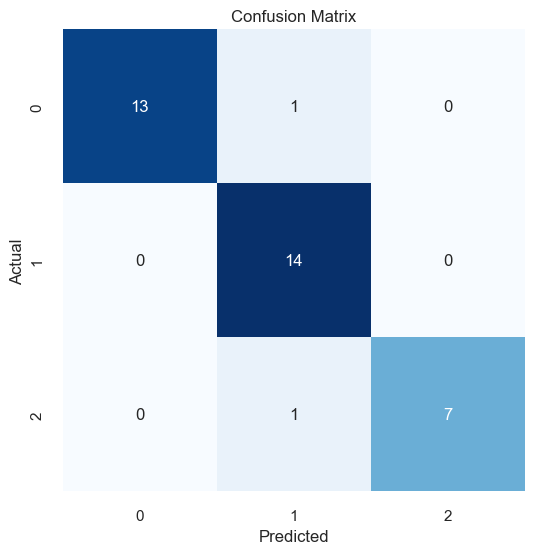


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


Classification Report Metrics:
                  1         2         3  accuracy  macro avg  weighted avg
precision  1.000000  0.875000  1.000000  0.944444   0.958333      0.951389
recall     0.928571  1.000000  0.875000  0.944444   0.934524      0.944444
f1-score   0.962963  0.933333  0.933333  0.944444   0.943210      0.944856


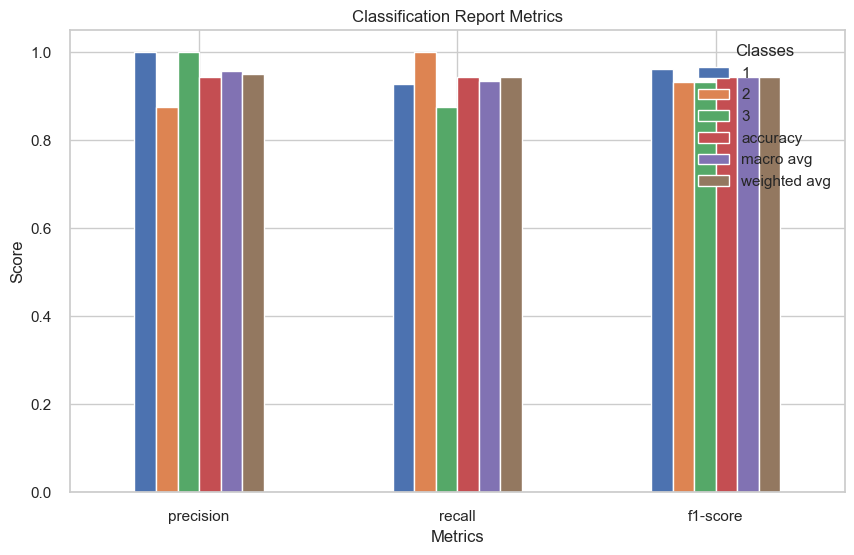

In [23]:
# TO DO: ADD YOUR CODE HERE

from sklearn.svm import SVC, LinearSVC
from sklearn.exceptions import ConvergenceWarning
import warnings

# ...

# Initialize the models
svc_model = SVC()
linear_svc_model = LinearSVC(dual=False, max_iter=10000)  # Explicitly set dual to False and increase max_iter

# ...

for size in data_sizes:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - size, random_state=42)
    
    # Suppress ConvergenceWarning
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
    
        # Evaluate the performance of the LinearSVC model
        linear_svc_scores = cross_validate(linear_svc_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
    
    linear_svc_train_accuracy = linear_svc_scores['train_score'].mean()
    linear_svc_validation_accuracy = linear_svc_scores['test_score'].mean()
    
    results.append({'Data Size': size, 'Model': 'LinearSVC', 'Training Accuracy': linear_svc_train_accuracy, 'Validation Accuracy': linear_svc_validation_accuracy})

# ...

best_model = results_df.loc[results_df.groupby('Model')['Validation Accuracy'].idxmax()]

# Select the best model
best_model_name = best_model['Model'].values[0]

# Initialize the best model instance
if best_model_name == 'LinearSVC':
    best_model_instance = LinearSVC(dual=False, max_iter=10000)
elif best_model_name == 'SVC':
    best_model_instance = SVC()

# Split the dataset consistently for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the best model
best_model_instance.fit(X_train, y_train)

# Predict
y_pred = best_model_instance.predict(X_test)

# Print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion_mat)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_rep)

# Visualize classification report metrics
classification_rep = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(classification_rep).transpose()
report_df.drop('support', axis=1, inplace=True)
report_df = report_df.transpose()

print("\nClassification Report Metrics:")
print(report_df)

report_df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Classes')
plt.show()


*ANSWER HERE*

In [ ]:
Data Linearity:

The suitability of LinearSVC depends on the linear separability of classes within your dataset. If it's feasible to separate the classes using a linear hyperplane, then LinearSVC is an appropriate choice. However, when your data resists linear separation, you may need to consider alternative methods, such as employing a kernelized SVM with a radial basis function (RBF) kernel, or exploring different classification algorithms altogether.

Training Efficiency:
LinearSVC is known for its expedited training process compared to kernelized SVMs like SVC with non-linear kernels. When dealing with sizable datasets where rapid model training is essential, LinearSVC becomes a favorable option.

Model Interpretability:
LinearSVC establishes a linear decision boundary, enhancing the interpretability of the model. This attribute can be valuable when you aim to gain insights into how individual features influence the classification outcome. If interpretability is a priority, LinearSVC is a preferred choice.